# Explore here

In [3]:
import numpy as np

np.sqrt(4)

2.0

In [4]:
import pandas as pd

main_df = pd.read_csv("https://raw.githubusercontent.com/sfreagin/linear_regression_example/main/insurance.csv")

In [5]:
main_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## EDA (Exploratory Data Analysis)

In [7]:
#check for nulls
main_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
main_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
quant_list = ['age', 'bmi', 'children', 'charges']

main_df[quant_list].mean()

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [14]:
main_df.iloc[10]

age                25
sex              male
bmi             26.22
children            0
smoker             no
region      northeast
charges     2721.3208
Name: 10, dtype: object

In [38]:
main_df.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

### Some Visuals

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='age', ylabel='Count'>

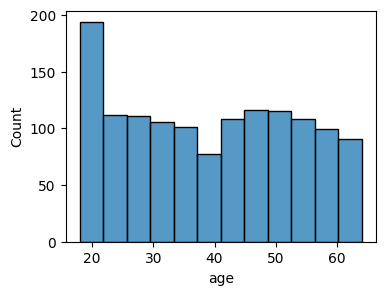

In [17]:
plt.figure(figsize=(4,3))
sns.histplot(x=main_df['age'])

<Axes: xlabel='sex', ylabel='count'>

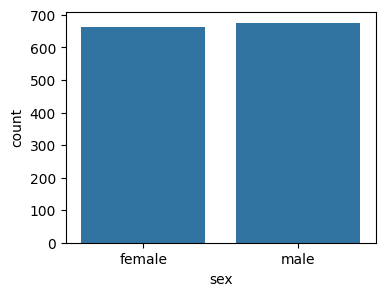

In [21]:
plt.figure(figsize=(4,3))
sns.countplot(x=main_df['sex'])

<Axes: xlabel='bmi', ylabel='Count'>

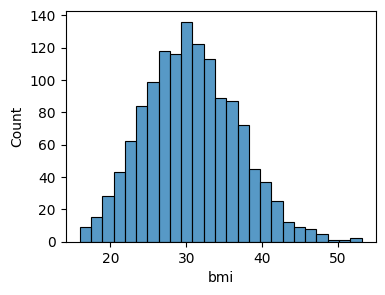

In [23]:

plt.figure(figsize=(4,3))
sns.histplot(main_df['bmi'])

<Axes: xlabel='bmi'>

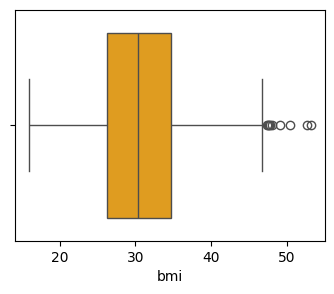

In [26]:
plt.figure(figsize=(4,3))
sns.boxplot(x=main_df['bmi'], color='orange')

In [27]:
main_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


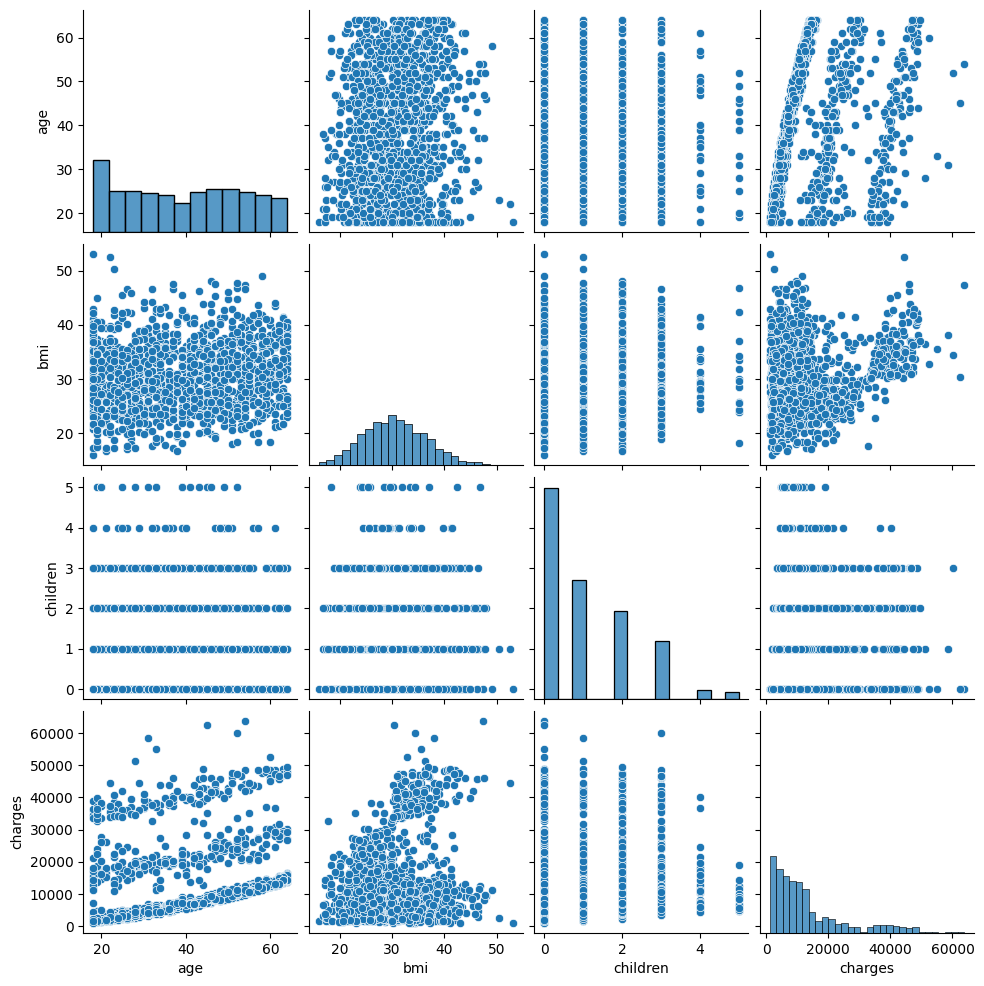

In [31]:
sns.pairplot(main_df,)

## Prepare dataset for modeling

1. Split into X (predictor) and y (target) vectors
2. Split into training and testing datasets
3. Transform categorical variables into dummy variables

In [40]:
X = main_df.drop(columns=['charges'])

y = main_df['charges']

In [46]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [49]:
#create dummy variables

X_dummies = pd.get_dummies(X, dtype='int', drop_first = True)

X_dummies

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [50]:
#split the dataset into training and testing datasets
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.3, random_state=4)

## Let's Build a Model!

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [116]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

### Make predictions using:
* #### The training set
* #### The testing set

In [117]:
train_preds = linreg.predict(X_train)
test_preds = linreg.predict(X_test)

I want to compare `train_preds` (the predictions on the training set) with the actual values `y_train`

Same for comparing the `test_preds` prediction on the test set with the actual `y_test` values

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [119]:
train_rmse = np.sqrt(mean_squared_error(y_true = y_train, y_pred = train_preds))

test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

print(f"My training RMSE is {train_rmse}")
print(f"My testing RMSE is {test_rmse}")

My training RMSE is 5903.076568164221
My testing RMSE is 6397.270624570064


<Axes: xlabel='charges'>

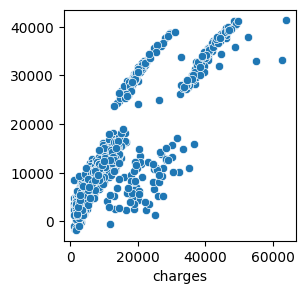

In [120]:
plt.figure(figsize=(3,3))
sns.scatterplot(x = y_train, y = train_preds)


<Axes: xlabel='charges', ylabel='Count'>

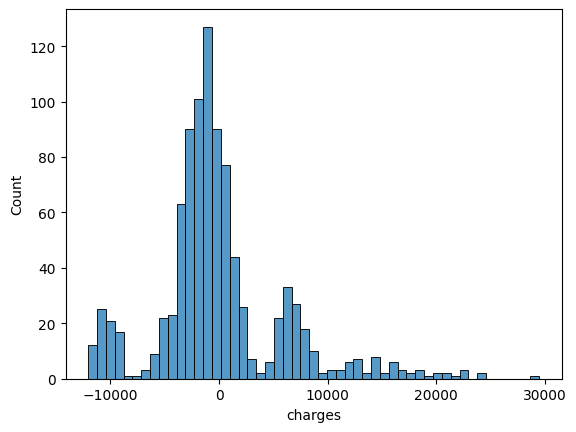

In [121]:
sns.histplot((y_train - train_preds))

### Looking at the coefficients

In [122]:
coef_df = pd.DataFrame([linreg.feature_names_in_, linreg.coef_]).T

coef_df

,0,1
0,age,267.542523
1,bmi,312.727445
2,children,412.257069
3,sex_male,-472.639982
4,smoker_yes,24498.228607
5,region_northwest,-209.473096
6,region_southeast,-1134.919638
7,region_southwest,-1147.947935


In [123]:
linreg.intercept_

-11301.16669764198

<Axes: xlabel='bmi', ylabel='charges'>

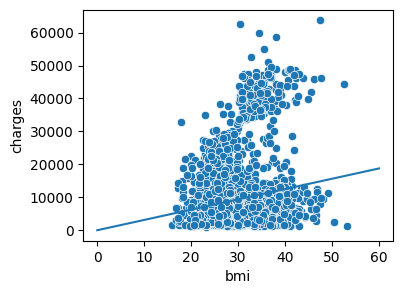

In [124]:
plt.figure(figsize=(4,3))
chart_x = np.linspace(0,60,1000)
chart_y = chart_x * 312.7 #+ linreg.intercept_

sns.scatterplot(y=main_df['charges'], x = main_df['bmi'])
sns.lineplot(x=chart_x, y=chart_y)